# Automated Keyword Extraction

#### gianmartind

### Import dataset

In [1]:
import pandas as pd

# dataset papers.csv
dataset = pd.read_csv('./papers.csv')
#hanya gunakan kolom id, year, abstract
dataset = dataset[['id', 'year', 'abstract']]
#ambil baris yang memiliki abstract
dataset = dataset[dataset['abstract'] != 'Abstract Missing']

dataset.head()

,id,year,abstract
941,1861,2000,Non-negative matrix factorization (NMF) has pr...
1067,1975,2001,Spike-triggered averaging techniques are effec...
2384,3163,2007,It is known that determinining whether a DEC-P...
2385,3164,2007,We present the first truly polynomial algorith...
2388,3167,2007,Semi-supervised inductive learning concerns ho...


### Buat word_count

In [2]:
dataset['word_count'] = dataset['abstract'].apply(lambda x:len(str(x).split(' ')))
dataset[['abstract','word_count']].head()

,abstract,word_count
941,Non-negative matrix factorization (NMF) has pr...,107
1067,Spike-triggered averaging techniques are effec...,81
2384,It is known that determinining whether a DEC-P...,67
2385,We present the first truly polynomial algorith...,143
2388,Semi-supervised inductive learning concerns ho...,119


In [3]:
dataset['word_count'].describe()

count    3924.000000
mean      148.390928
std        45.605755
min        19.000000
25%       116.000000
50%       143.000000
75%       177.000000
max       317.000000
Name: word_count, dtype: float64

In [4]:
#common words
freq_common = pd.Series(' '.join(dataset['abstract']).split()).value_counts()[:20]
freq_common

the         29793
of          20918
a           16339
and         13626
to          12869
in           8980
that         7838
is           7666
for          7169
We           6238
on           5579
we           5167
with         4512
this         3677
as           3643
are          3529
an           3366
by           3197
can          2953
learning     2825
dtype: int64

In [5]:
#uncommon word
freq_uncommon =  pd.Series(' '.join(dataset 
         ['abstract']).split()).value_counts()[-20:]
freq_uncommon

\RR^{n                    1
Frederic                  1
reciprocity               1
(PWLC)                    1
rate-optimal.             1
track.                    1
13                        1
mechanism's               1
(SGRHMC).                 1
analogies.                1
regularization:           1
-counts.                  1
end-to-end-learning       1
1/e)\operatorname{OPT}    1
readings.                 1
query-specific            1
AX                        1
optimization-theoretic    1
class?                    1
wanted                    1
dtype: int64

### Text Pre-processing

In [6]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [10]:
#removing stopwords

stop_words = set(stopwords.words("english"))

new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]

stop_words = stop_words.union(new_words)

In [11]:
#cleaned and normalised text corpus
corpus = []
for i in dataset.index:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['abstract'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [12]:
corpus[222]

'actor critic algorithm reinforcement learning achieving renewed popularity due good convergence property situation approach often fail e g function approximation involved interestingly growing evidence actor critic approach based phasic dopamine signal play key role biological learning cortical basal ganglion derive temporal difference based actor critic learning algorithm convergence proved without assuming separate time scale actor critic approach demonstrated applying network spiking neuron established relation phasic dopamine temporal difference signal lends support biological relevance algorithm'

### Data Exploration

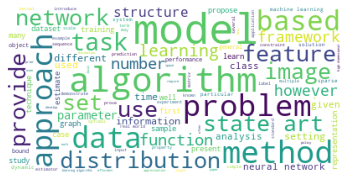

In [13]:
#word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)


### Text preparation

In [14]:
#vektorize
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(corpus)

list(cv.vocabulary_.keys())[:10]

['non',
 'negative',
 'matrix',
 'factorization',
 'nmf',
 'useful',
 'decomposition',
 'multivariate',
 'data',
 'different']

### Visualize top N uni-grams, bi-grams & tri-grams

ipykernel_launcher:17: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(2000.0, 0, ''),
 Text(3000.0, 0, ''),
 Text(4000.0, 0, ''),
 Text(5000.0, 0, ''),
 Text(6000.0, 0, '')]

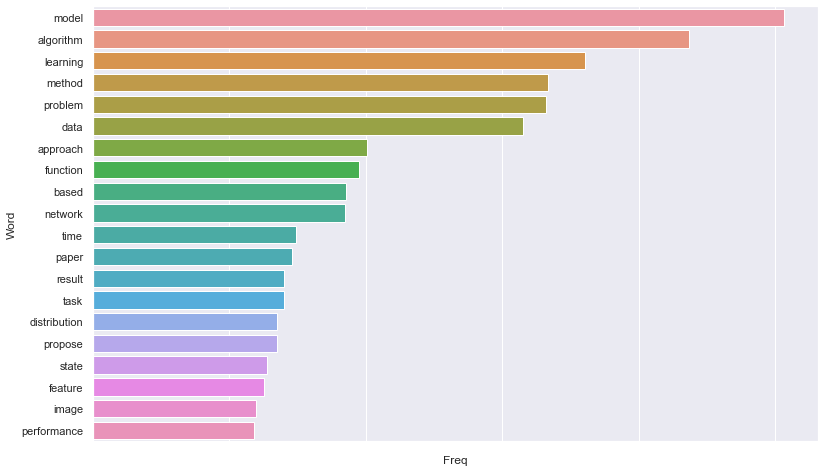

In [49]:
def get_top_n_most_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

top_words = get_top_n_most_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=['Word','Freq']

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(y="Word", x="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels())


ipykernel_launcher:21: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0.0, 0, ''),
 Text(100.0, 0, ''),
 Text(200.0, 0, ''),
 Text(300.0, 0, ''),
 Text(400.0, 0, ''),
 Text(500.0, 0, ''),
 Text(600.0, 0, ''),
 Text(700.0, 0, ''),
 Text(800.0, 0, '')]

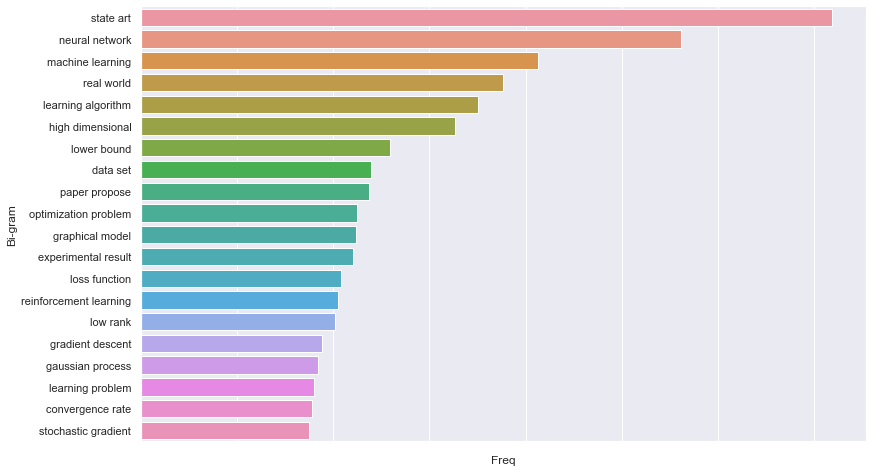

In [48]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec2 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec2.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec2.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(y="Bi-gram", x="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels())

ipykernel_launcher:21: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, ''),
 Text(120.0, 0, '')]

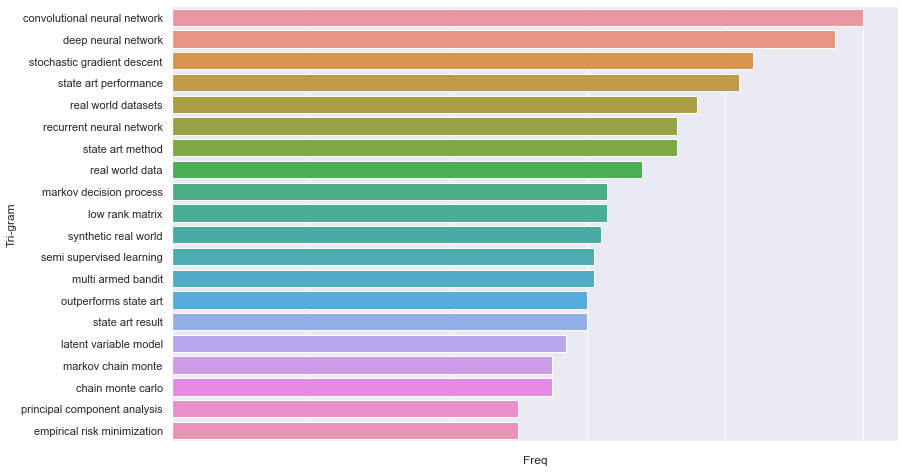

In [52]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec3 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec3.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec3.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(y="Tri-gram", x="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels())

### Converting to a matrix of integers

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(X)

#get feature names
feature_names = cv.get_feature_names()

# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [55]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
present theory compositionality stochastic optimal control showing task optimal controller constructed certain primitive primitive feedback controller pursuing agenda mixed proportion much progress making towards agenda compatible agenda present task resulting composite control law provably optimal problem belongs certain class class rather general yet number unique property bellman equation made linear even non linear discrete dynamic give rise compositionality developed special case linear dynamic gaussian noise framework yield analytical solution e non linear mixture linear quadratic regulator without requiring final cost quadratic generally natural set control primitive constructed applying svd green function bellman equation illustrate theory context human arm movement idea optimality compositionality prominent field motor control yet hard reconcile work make possible

Keywords:
compositionality 0.326
primitive 0.292
control 0.255
linear 0.212
controller 0.198
